In [1]:
import pandas as pd

def load_csv_and_print_columns(file_path):
    try:
        # Load the CSV file into a pandas DataFrame
        df = pd.read_csv(file_path)

        # Print the column names
        print("Column Names:")
        print(df.columns.tolist())
        df = pd.read_csv(file_path)
        print("shape of dataset ", df.shape)
        df.columns = ["id", "game", "sentiment label", "tweet"]
        df = df.head(5)  # k is an integer
    except Exception as e:
        print(f"An error occurred: {e}")
# Replace 'your_file_path.csv' with the path to your CSV file
file_path = '../data/raw/twitter_training.csv'
load_csv_and_print_columns(file_path)


KeyboardInterrupt: 

In [2]:
import torch

def load_tensor_and_print_shape(file_path):
    # Load the tensor from the file
    tensor = torch.load(file_path)

    # Print the shape of the tensor
    print("Shape of the tensor:", tensor.shape)

# Replace 'path/to/your/tensor.pt' with the actual path to your .pt file
texts_path = '../data/processed/text_embeddings.pt'
load_tensor_and_print_shape(texts_path)
labels_path = '../data/processed/labels.pt'
load_tensor_and_print_shape(labels_path)


Shape of the tensor: torch.Size([25000, 768])
Shape of the tensor: torch.Size([25000, 4])


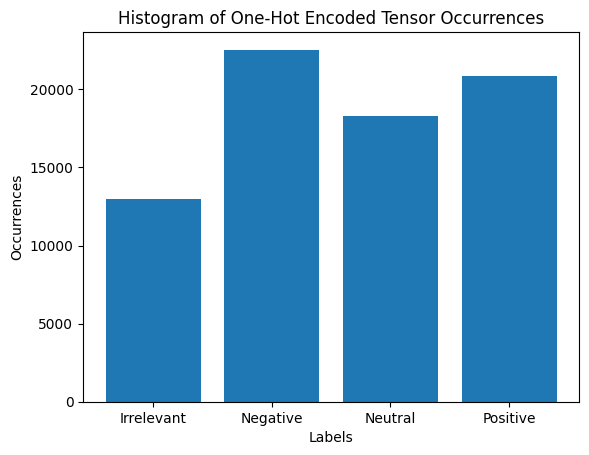

In [15]:
import json
import torch
import matplotlib.pyplot as plt

# Function to load the mapping from a JSON file
def load_mapping(json_file_path):
    with open(json_file_path, 'r') as file:
        mapping = json.load(file)
    return mapping

# Function to load the one-hot encoded elements from a .pt file
def load_tensors(pt_file_path):
    return torch.load(pt_file_path)

# Function to count the occurrences of each type of tensor
def count_tensor_occurrences(tensors, mapping):
    counts = {label: 0 for label in mapping}
    for tensor in tensors:
        for label, one_hot in mapping.items():
            if torch.equal(tensor, torch.tensor(one_hot)):
                counts[label] += 1
                break
    return counts

# Function to plot a histogram
def plot_histogram(counts):
    labels = counts.keys()
    values = counts.values()

    plt.bar(labels, values)
    plt.xlabel('Labels')
    plt.ylabel('Occurrences')
    plt.title('Histogram of One-Hot Encoded Tensor Occurrences')
    plt.show()

# Paths to your files (replace with your actual file paths)

json_file_path = "../data/processed/category_mapping.txt"
pt_file_path = "../data/processed/labels.pt"

# Load mapping and tensors
mapping = load_mapping(json_file_path)
tensors = load_tensors(pt_file_path)

# Count occurrences
counts = count_tensor_occurrences(tensors, mapping)

# Plot histogram
plot_histogram(counts)